In [1]:
# Python script for numerically modeling the expansion of the universe. Code describing an isotropic and homogeneous
#(Friedmann-Lemaitre-Robertson-Walker) cosmologies

import math

# Constants
# note that darkEnergyDensity is effecitvely the cosmological constant 

hubbleConst = 7.2e-11				# in inverse years
gravConst = 66450					# in m^3 / kg / yr^2
matterDensity = 2.53e-27			# in kg / m^3
radiationDensity = 5.6e-31			#  ...
darkEnergyDensity = 6.78e-27		#  ...

darkEnergyW = 0					# dimensionless equation-of-state parameter
darkEnergyFactor = 3.0 * darkEnergyW + 1.0
darkEnergyPower = 3.0 * darkEnergyW + 2.0

timeStep = 1.0e7					# in years

# Run simulation backward from present day until scale factor is < 0.01

lResultsBackward = []

curTime = 0.0
curScale = 1.0
curHubble = hubbleConst

while curScale > 0.01:
	matterTerm = matterDensity / (curScale ** 2)
	radiationTerm = 2.0 * radiationDensity / (curScale ** 3)
	darkEnergyTerm = darkEnergyFactor * darkEnergyDensity / (curScale ** darkEnergyPower)
	
	accel = -4.0/3.0 * math.pi * gravConst * (matterTerm + radiationTerm + darkEnergyTerm)
	curHubble = curHubble - timeStep * accel
	curScale = curScale - timeStep * curHubble
	curTime = curTime - timeStep

	lResultsBackward.append((curTime / 1.0e9, curScale))

# Run simulation forward from present day for another 10 billion years

lResultsForward = []

curTime = 0.0
curScale = 1.0
curHubble = hubbleConst

while curTime < 1.0e10:
	matterTerm = matterDensity / (curScale ** 2)
	radiationTerm = 2.0 * radiationDensity / (curScale ** 3)
	darkEnergyTerm = darkEnergyFactor * darkEnergyDensity / (curScale ** darkEnergyPower)
	
	accel = -4.0/3.0 * math.pi * gravConst * (matterTerm + radiationTerm + darkEnergyTerm)
	curHubble = curHubble + timeStep * accel
	curScale = curScale + timeStep * curHubble
	curTime = curTime + timeStep

	lResultsForward.append((curTime / 1.0e9, curScale))

# Write results to a tab-delimited text file

lResultsBackward.reverse()
lResults = lResultsBackward + [(0.0, 1.0)] + lResultsForward
f = open('bigbang2.txt', 'w')
for result in lResults:
	f.write('%f\t%f\n' % result)

print('Results written to bigbang.txt.')


Results written to bigbang.txt.


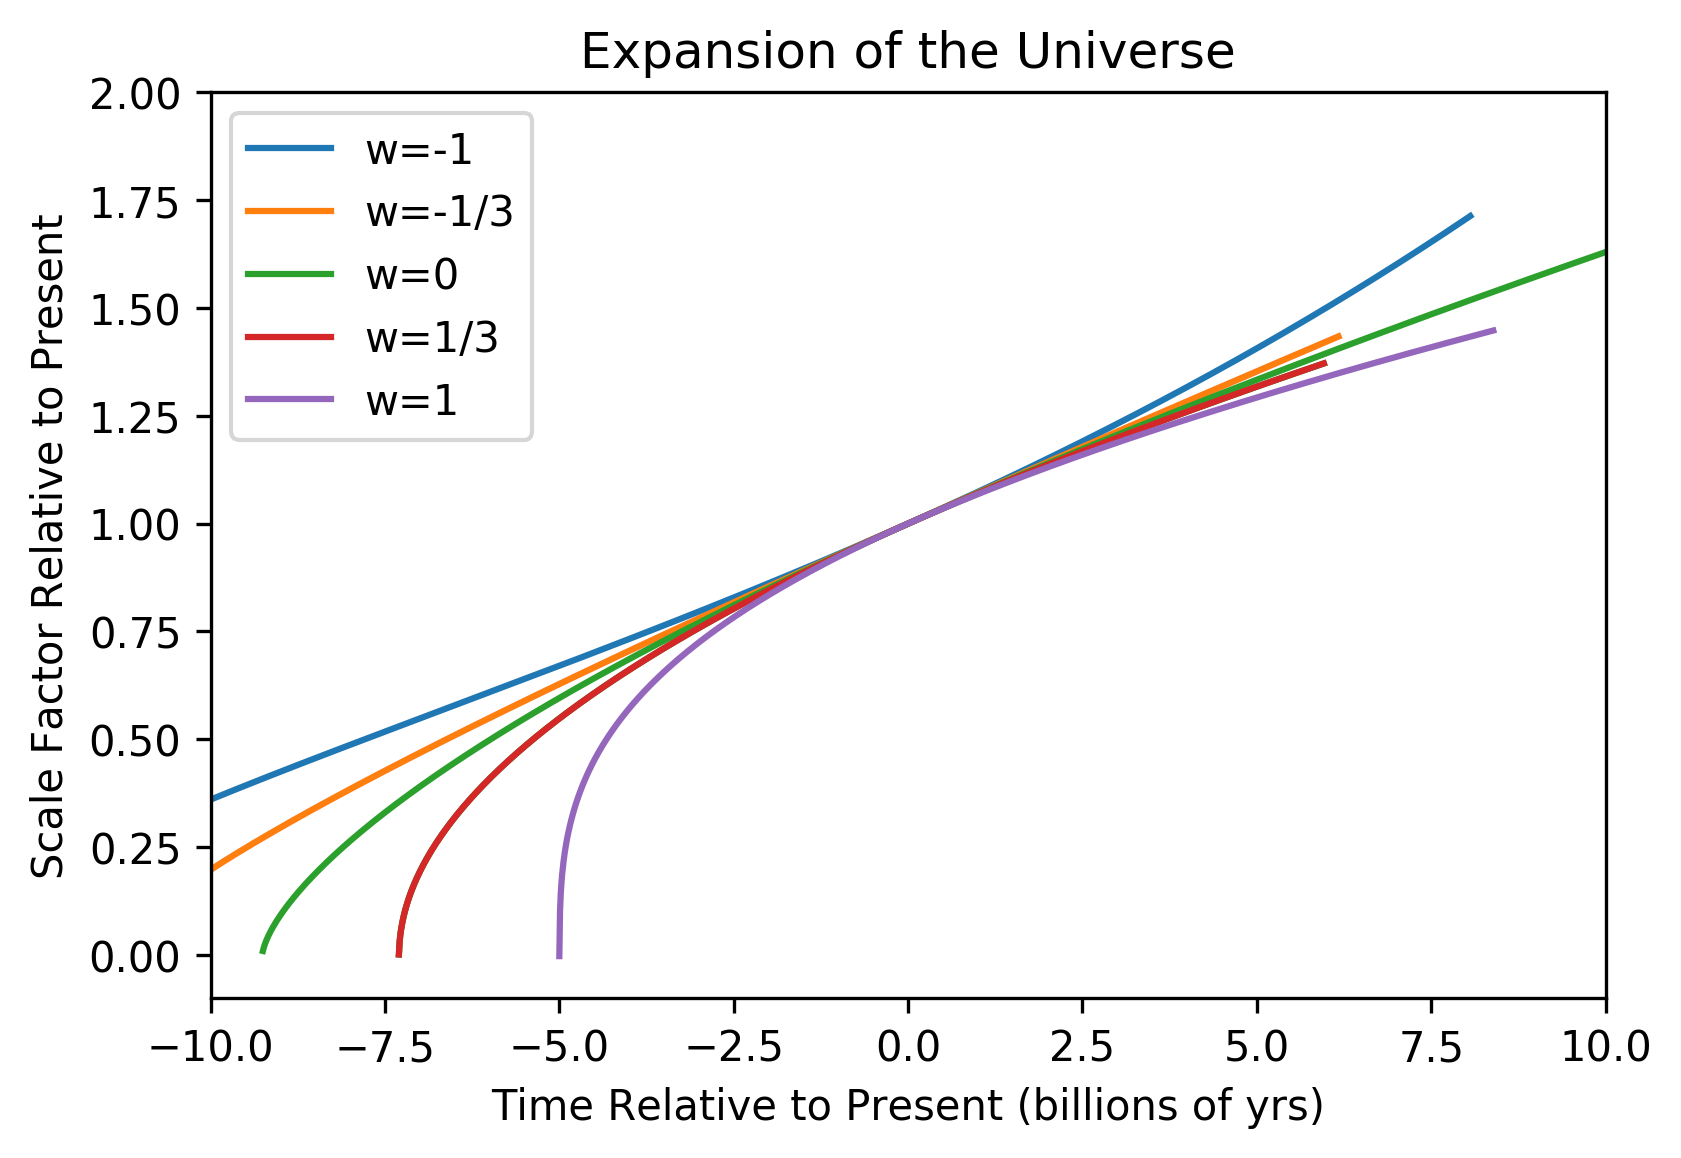

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

X1 = np.genfromtxt('bigbang1x.txt')
Y1 = np.genfromtxt('bigbang1y.txt')
# plt.plot(X1, Y1, color='orange')


X2 = np.genfromtxt('bigbang2x.txt')
Y2 = np.genfromtxt('bigbang2y.txt')
# plt.plot(X2, Y2, color='blue')

X3 = np.genfromtxt('bigbang3x.txt')
Y3 = np.genfromtxt('bigbang3y.txt')
plt.plot(X3, Y3, color='green')

X4 = np.genfromtxt('bigbang4x.txt')
Y4 = np.genfromtxt('bigbang4y.txt')
# plt.plot(X4, Y4, color='yellow')


X5 = np.genfromtxt('bigbang5x.txt')
Y5 = np.genfromtxt('bigbang5y.txt')
plt.plot(X5, Y5, color='pink')


# X6 = np.genfromtxt('bigbang6x.txt')
# Y6 = np.genfromtxt('bigbang6y.txt')
# plt.plot(X6, Y6, color='pink')

plt.xlabel('Time Relative to Present (billions of yrs)')
plt.ylabel('Scale Factor Relative to Present')
plt.title('Expansion of the Universe')


plt.plot(X1, Y1, label="w=-1")
plt.plot(X5, Y5, label="w=-1/3")
plt.plot(X2, Y2, label="w=0")
plt.plot(X3, Y3, label="w=1/3")
plt.plot(X4, Y4, label="w=1")
# plt.plot(X6, Y6, label="w=5")
plt.legend(loc="upper left")
plt.ylim(-0.1, 2.0)
plt.xlim(-10, 10)
plt.show()

# 3D Contour Plots 

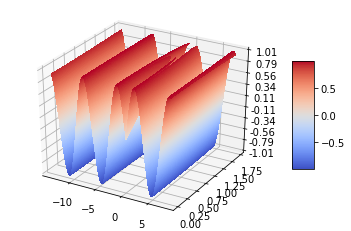

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.genfromtxt('bigbang1x.txt')
Y = np.genfromtxt('bigbang1y.txt')
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

